In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.linalg as linalg
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def getNormLaplacian(W):
    """input matrix W=(w_ij)
    "compute D=diag(d1,...dn)
    "and L=D-W
    "and Lbar=D^(-1/2)LD^(-1/2)
    "return Lbar
    """
    d=[np.sum(row) for row in W]
    D=np.diag(d)
    L=D-W
    #Dn=D^(-1/2)
    Dn=np.power(np.linalg.matrix_power(D,-1),0.5)
    Lbar=np.dot(np.dot(Dn,L),Dn)
    
    return Lbar

In [4]:
def getKSmallestEigVec(Lbar,k):
    """input
    "matrix Lbar and k
    "return
    "k smallest eigen values and their corresponding eigen vectors
    """
    eigval,eigvec=linalg.eig(Lbar)
    dim=len(eigval)
 
    #查找前k小的eigval
    dictEigval=dict(zip(eigval,range(0,dim)))
    kEig=np.sort(eigval)[0:k]
    ix=[dictEigval[k] for k in kEig]
    return eigval[ix],eigvec[:,ix]

In [5]:
def checkResult(Lbar,eigvec,eigval,k):
    """
    "input
    "matrix Lbar and k eig values and k eig vectors
    "print norm(Lbar*eigvec[:,i]-lamda[i]*eigvec[:,i])
    """
    check=[np.dot(Lbar,eigvec[:,i])-eigval[i]*eigvec[:,i] for i in range(0,k)]
    length=[np.linalg.norm(e) for e in check]/np.spacing(1)
    print("Lbar*v-lamda*v are %s*%s" % (length,np.spacing(1)))

In [6]:
def readNetwork(filename):

    edges = pd.read_table(filename, header=None,delim_whitespace=True)
    #read_edgelists

    for i in range(len(edges)):
        g.add_edge(edges.iloc[i,0],edges.iloc[i,1])

In [7]:
g = nx.DiGraph()
readNetwork(r"D:\大三上\社交媒体\facebook\0_edges.csv")

In [8]:
g

In [9]:
nodeNum=len(g.nodes())
m=nx.to_numpy_matrix(g,g.nodes)

In [10]:
g.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 2

In [11]:
m.shape

(333, 333)

In [12]:
Lbar=getNormLaplacian(m)

In [13]:
print(Lbar)

[[ 1.          0.          0.         ...,  0.         -0.04902903  0.        ]
 [ 0.          1.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          1.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.          0.          0.        ]
 [-0.04902903  0.          0.         ...,  0.          1.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          1.        ]]


In [14]:
Lbar=getNormLaplacian(m)
k=2
kEigVal,kEigVec=getKSmallestEigVec(Lbar,k)
print("k eig val are %s" % kEigVal)
print("k eig vec are %s" % kEigVec)

k eig val are [ -2.46154935e-15+0.j  -9.93807224e-16+0.j]
k eig vec are [[ -9.22726596e-17  -1.29228907e-03]
 [ -1.77516519e-16  -9.69216805e-04]
 [ -1.84526300e-16  -1.29228907e-03]
 [ -3.59979767e-16  -9.69216805e-04]
 [ -2.18045547e-16  -1.11915517e-03]
 [  6.20275229e-17  -7.22411554e-04]
 [  1.86537476e-16  -1.40823937e-03]
 [  4.77462245e-17  -8.54768878e-04]
 [  2.23515014e-16  -2.41765148e-03]
 [ -1.49706991e-16  -9.69216805e-04]
 [ -8.49480417e-17  -1.76953969e-03]
 [ -1.57576028e-17  -1.20882574e-03]
 [ -2.15658657e-16  -9.13786367e-04]
 [ -1.60966085e-16  -1.11915517e-03]
 [ -9.31087127e-17  -1.25125352e-03]
 [  7.27554104e-17  -1.20882574e-03]
 [ -7.14095797e-17  -2.58457815e-03]
 [  1.04167008e-16  -1.02164422e-03]
 [ -3.05117317e-17  -1.29228907e-03]
 [ -1.00380791e-17  -1.25125352e-03]
 [  9.19533310e-17  -2.66412217e-03]
 [  2.60645546e-16  -2.64446049e-03]
 [ -3.14058027e-16  -6.46144537e-04]
 [ -1.00014967e-16  -1.11915517e-03]
 [  3.06626047e-16  -1.11915517e-03]
 [ 

In [15]:
checkResult(Lbar,kEigVec,kEigVal,k)

Lbar*v-lamda*v are [ 20.84433809  12.42698745]*2.22044604925e-16


In [16]:
clusterA=[i for i in range(0,nodeNum) if kEigVec[i,1]>0]
clusterB=[i for i in range(0,nodeNum) if kEigVec[i,1]<0]

In [17]:
colList=dict.fromkeys(g.nodes())

In [22]:
colList.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 

In [26]:
colList_values = list(colList.values())

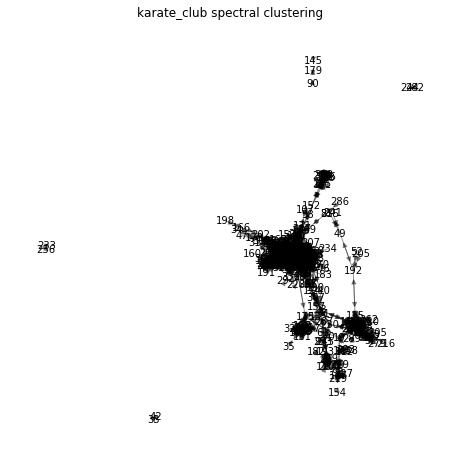

In [27]:
for node,score in colList.items():
    if node in clusterA:
        colList[node]=0
    else:
        colList[node]=0.6
plt.figure(figsize=(8,8))
pos=nx.spring_layout(g)
nx.draw_networkx_edges(g,pos,alpha=0.4)
nx.draw_networkx_nodes(g,pos,nodelist=colList.keys(),
        node_color=colList_values,
        cmap=plt.cm.Reds_r)
nx.draw_networkx_labels(g,pos,font_size=10,font_family='sans-serif')
plt.axis('off')
plt.title("karate_club spectral clustering")
plt.savefig("spectral_clustering_result.png")

In [28]:
plt.show()